<a href="https://colab.research.google.com/github/santiagojaralopez/numericalMethodsPython/blob/main/numericalMethods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Numerical methods with Python

##Installations required

In [1]:
!pip install numdifftools

     |████████████████████████████████| 99 kB 6.2 MB/s 
     |████████████████████████████████| 189 kB 48.1 MB/s 
  Created wheel for algopy: filename=algopy-0.5.7-py3-none-any.whl size=107608 sha256=ef3e6ff8f083e208803a700376e3a640dce22c8ad939cf468635ebb76df4e0c8
  Stored in directory: /root/.cache/pip/wheels/a8/fd/06/21dc6aba9f680fdbde386c06b1a8a1cf3d9a5f6bd96e31dcd4
Successfully built algopy


##Imports required

In [2]:
import numpy as np
from scipy.misc import derivative
import numdifftools as nd
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

##Root-finding methods

###Bisection Method

In [ ]:
def bisection(function: 'function', low_lim: float, upp_lim: float, itr: int) -> float:
  prev_itr = 0

  for i in range(itr-1):
    current_itr = (low_lim + upp_lim) / 2
    error = abs( (current_itr - prev_itr) / current_itr )*100

    print(f'Lower limit: {low_lim}  |  x{i}: {current_itr}  |  Upper limit: {upp_lim}')
    print(f'f({current_itr})= {function(current_itr)}')
    print(f'Error: {"%.9f"%error}%')
    print('-'*9)

    if (function(low_lim)*function(current_itr)) < 0:
      upp_lim = current_itr
    else:
      low_lim = current_itr

    prev_itr = current_itr

  return current_itr

In [ ]:
f = lambda x: np.log(x**2)-0.7

ans = bisection(f, 0.5, 2, 6)

Lower limit: 0.5  |  x0: 1.25  |  Upper limit: 2
f(1.25)= -0.2537128973715804
Error: 100.000000000%
---------
Lower limit: 1.25  |  x1: 1.625  |  Upper limit: 2
f(1.625)= 0.2710156315634017
Error: 23.076923077%
---------
Lower limit: 1.25  |  x2: 1.4375  |  Upper limit: 1.625
f(1.4375)= 0.025810987378736994
Error: 13.043478261%
---------
Lower limit: 1.25  |  x3: 1.34375  |  Upper limit: 1.4375
f(1.34375)= -0.10907157421232816
Error: 6.976744186%
---------
Lower limit: 1.34375  |  x4: 1.390625  |  Upper limit: 1.4375
f(1.390625)= -0.040493427255063996
Error: 3.370786517%
---------


###Regula Falsi (False position)

In [ ]:
def regula_falsi(function: 'function', low_lim: float, upp_lim: float, itr: int) -> float:
  prev_itr = 0

  for i in range(itr-1):
    current_itr = upp_lim + (( function(upp_lim)*(low_lim-upp_lim) )/( function(upp_lim)-function(low_lim) ))
    error = abs( (current_itr - prev_itr) / current_itr )*100

    print(f'Lower limit: {low_lim}  |  x{i}: {current_itr}  |  Upper limit: {upp_lim}')
    print(f'f({current_itr})= {function(current_itr)}')
    print(f'Error: {"%.9f"%error}%')
    print('-'*9)

    if (function(low_lim)*function(current_itr)) < 0:
      upp_lim = current_itr
    else:
      low_lim = current_itr

    prev_itr = current_itr

  return current_itr

In [ ]:
f = lambda x: np.log(x**2)-0.7

ans = regula_falsi(f, 0.5, 2, 6)

Lower limit: 0.5  |  x0: 1.628707448233353  |  Upper limit: 2
f(1.628707448233353)= 0.27557344740501244
Error: 100.000000000%
---------
Lower limit: 0.5  |  x1: 1.4970143020298659  |  Upper limit: 1.628707448233353
f(1.4970143020298659)= 0.10694531837203947
Error: 8.797053310%
---------
Lower limit: 0.5  |  x2: 1.4483985429092023  |  Upper limit: 1.4970143020298659
f(1.4483985429092023)= 0.04091698581713721
Error: 3.356518091%
---------
Lower limit: 0.5  |  x3: 1.4301560632491133  |  Upper limit: 1.4483985429092023
f(1.4301560632491133)= 0.01556714691249994
Error: 1.275558670%
---------
Lower limit: 0.5  |  x4: 1.423266990856467  |  Upper limit: 1.4301560632491133
f(1.423266990856467)= 0.005909853693258804
Error: 0.484032331%
---------


###Fixed Point

In [ ]:
def fixed_point(function: 'function', x_0: float, itr: int) -> float:
  prev_itr = 0
  current_itr = function(x_0)
  print(f'x0= {current_itr}')

  for i in range(0, itr):
    current_itr = function(current_itr)
    error = abs( (current_itr - prev_itr) / current_itr )*100

    print(f'X{i+1}= {current_itr}')
    print(f'Error: {"%.9f"%error}%')
    print('-'*9)

    prev_itr = current_itr

  return current_itr

In [ ]:
#In this method, to find  e^(-x)-x  root, we use  e^(-x). Remember always to add X to both sides of the equation.

f = lambda x: np.exp(-x)

ans = fixed_point(f, 0, 5)

x0= 1.0
X1= 0.36787944117144233
Error: 100.000000000%
---------
X2= 0.6922006275553464
Error: 46.853639461%
---------
X3= 0.5004735005636368
Error: 38.309146593%
---------
X4= 0.6062435350855974
Error: 17.446789681%
---------
X5= 0.545395785975027
Error: 11.156622525%
---------


###Newton-Raphson

In [ ]:
def newton_raphson(function: 'function', x_0: float, itr: int) -> float:
  prev_itr = 0
  current_itr = function(x_0)
  print(f'x0= {current_itr}')

  for i in range(0, itr):
    current_itr = current_itr - ( function(current_itr) / derivative(function, current_itr, 1e-10) )
    error = abs( (current_itr - prev_itr) / current_itr )*100

    print(f'X{i+1}= {current_itr}')
    print(f'Error: {"%.9f"%error}%')
    print('-'*9)

    prev_itr = current_itr

  return current_itr

In [ ]:
f = lambda x: np.exp(-x) + x - 2

ans = newton_raphson(f, 2, 7)

x0= 0.1353352832366128
X1= 7.966500519556389
Error: 100.000000000%
---------
X2= 1.9975860332643807
Error: 298.806378644%
---------
X3= 1.8434235591441315
Error: 8.362835191%
---------
X4= 1.8414060413774163
Error: 0.109563981%
---------
X5= 1.841405660436523
Error: 0.000020688%
---------
X6= 1.8414056604369606
Error: 0.000000000%
---------
X7= 1.8414056604369606
Error: 0.000000000%
---------


###Secant

In [ ]:
def secant(function: 'function', xi_1: float, xi: float, itr: int) -> float:
  prev_itr = 0

  for i in range(itr-1):
    current_itr = xi - ( ( function(xi)*(xi_1-xi) ) / ( f(xi_1)-f(xi) ) )
    error = abs( (current_itr - prev_itr) / current_itr )*100

    print(f'Xi-1: {xi_1}  |  x{i}: {current_itr}  |  Xi: {xi}')
    print(f'Error: {"%.9f"%error}%')
    print('-'*9)

    if current_itr < xi:
      xi_1 = current_itr
    else:
      xi = current_itr

    prev_itr = current_itr

  return current_itr

In [ ]:
f = lambda x: (x**3) + x + 16

ans = secant(f, -3, -2, 5)

Xi-1: -3  |  x0: -2.3  |  Xi: -2
Error: 100.000000000%
---------
Xi-1: -2.3  |  x1: -2.4029550033579583  |  Xi: -2
Error: 4.284516490%
---------
Xi-1: -2.4029550033579583  |  x2: -2.385106574353053  |  Xi: -2
Error: 0.748328364%
---------
Xi-1: -2.385106574353053  |  x3: -2.388124765962737  |  Xi: -2
Error: 0.126383330%
---------


##Nonlinear equations methods

###Newton-Raphson

In [ ]:
'''In this method we have to use partial derivatives, however, in Python, the ways to calculate these derivatives are quite weird, so we are gonna
 skip all those calculations and obtain the derivatives evaluated in the required points with the "Gradient" (if you don't know what the
 Gradient is, I recommend you to go and take a look before trying to understand this code). Happy coding :) '''

def newton_raphson_nonlinear_eq(U: 'function', V: 'function', x_0: float, y_0: float, itr: int) -> tuple:
  prev_itr_x = 0
  prev_itr_y = 0

  dUdx, dUdy = nd.Gradient(U)([x_0, y_0])
  dVdx, dVdy = nd.Gradient(V)([x_0, y_0])

  xi_1 = x_0 - ((U([x_0, y_0])*dVdy - V([x_0, y_0])*dUdy) / (dUdx*dVdy - dVdx*dUdy))
  yi_1 = y_0 - ((V([x_0, y_0])*dUdx - U([x_0, y_0])*dVdx) / (dUdx*dVdy - dVdx*dUdy))

  print(f'x0= {xi_1}')
  print(f'y0= {yi_1}')
  print('-'*9)

  for i in range(0, itr):
    dUdx, dUdy = nd.Gradient(U)([xi_1, yi_1])
    dVdx, dVdy = nd.Gradient(V)([xi_1, yi_1])

    xi_1 = xi_1 - ((U([xi_1, yi_1])*dVdy - V([xi_1, yi_1])*dUdy) / (dUdx*dVdy - dVdx*dUdy))
    yi_1 = yi_1 - ((V([xi_1, yi_1])*dUdx - U([xi_1, yi_1])*dVdx) / (dUdx*dVdy - dVdx*dUdy))

    error_x = abs( (xi_1 - prev_itr_x) / xi_1 )*100
    error_y = abs( (yi_1 - prev_itr_y) / yi_1 )*100

    print(f'X{i+1}= {xi_1}')
    print(f'Y{i+1}= {yi_1}')
    print(f'Error_x: {"%.9f"%error_x}%')
    print(f'Error_y: {"%.9f"%error_y}%')
    print('-'*9)

    prev_itr_x = xi_1
    prev_itr_y = yi_1

  return (xi_1, yi_1)

In [ ]:
f = lambda x: (x[0]**2) + (x[0]*x[1]) - 10
g = lambda x: x[1] + (3*x[0]*(x[1]**2)) - 57

newton_raphson_nonlinear_eq(f, g, 1.5, 3.5, 5)

x0= 2.0360288230584476
y0= 2.8438751000800644
---------
X1= 1.9987006090558241
Y1= 3.002459495522139
Error_x: 100.000000000%
Error_y: 100.000000000%
---------
X2= 1.9999999353297688
Y2= 2.999999695020434
Error_x: 0.064966316%
Error_y: 0.081993358%
---------
X3= 1.9999999999999953
Y3= 3.0000000000000284
Error_x: 0.000003234%
Error_y: 0.000010166%
---------
X4= 1.9999999999999998
Y4= 3.0
Error_x: 0.000000000%
Error_y: 0.000000000%
---------
X5= 2.0
Y5= 3.0
Error_x: 0.000000000%
Error_y: 0.000000000%
---------


(2.0, 3.0)

##Polynomial Interpolation

###Lagrange Polynomial

In [ ]:
def lagrange_polynomial(X: tuple, Y: tuple, values_amount: int):
  polynomial = ""

  if len(X) != len(Y):
    raise NameError('Tuples different length')
  else:
    for k in range(values_amount):
      for i in range(values_amount):
        if i != k:
          polynomial += f"[( x-({X[i]}) ) / ({X[k]-X[i]})] "
        else:
          continue
    
      polynomial += f" [{Y[k]}] +\n" if k!=values_amount-1 else f" [{Y[k]}]"

  print(polynomial)

In [ ]:
lagrange_polynomial((-3, 5, 7, 8), (9, 2, -1, 0), 4)

[( x-(5) ) / (-8)] [( x-(7) ) / (-10)] [( x-(8) ) / (-11)]  [9] +
[( x-(-3) ) / (8)] [( x-(7) ) / (-2)] [( x-(8) ) / (-3)]  [2] +
[( x-(-3) ) / (10)] [( x-(5) ) / (2)] [( x-(8) ) / (-1)]  [-1] +
[( x-(-3) ) / (11)] [( x-(5) ) / (3)] [( x-(7) ) / (1)]  [0]


###Newton Polynomial

In [ ]:
def newton_interpolation(X: tuple, Y: tuple):
  n=len(X)
  A=np.zeros([n,n])
  
  for i in range(0,n):
    A[i][0] = Y[i]
  
  for j in range(1,n):
    for i in range(j,n):
      A[i][j] = (A[i][j-1] - A[i-1][j-1])/(X[i]-X[i-j])
    
  return A

In [ ]:
X = (1930, 1940, 1950, 1960, 1970, 1980)
Y = (123203, 131669, 150697, 179323, 203212, 226505)
df = pd.DataFrame( newton_interpolation(X, Y) )
df

,0,1,2,3,4,5
0,123203.0,0.0,0.000,0.000000,0.000000,0.000000
1,131669.0,846.6,0.000,0.000000,0.000000,0.000000
2,150697.0,1902.8,52.810,0.000000,0.000000,0.000000
3,179323.0,2862.6,47.990,-0.160667,0.000000,0.000000
4,203212.0,2388.9,-23.685,-2.389167,-0.055712,0.000000
5,226505.0,2329.3,-2.980,0.690167,0.076983,0.002654


###Cubic Spline

In [ ]:
def cubic_spline(X: tuple, Y:tuple, xmin: float, xmax: float, predict: float):
  f = CubicSpline(X, Y, bc_type='natural')
  x_new = np.linspace(xmin, xmax, 100)
  y_new = f(x_new)

  print(f'Prediction for {predict}: {f(predict)}')

  plt.figure(figsize = (10,8))
  plt.plot(x_new, y_new, 'b')
  plt.plot(X, Y, 'ro')
  plt.title('Cubic Spline Interpolation')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.show()

Prediction for 1.5: 2.78125


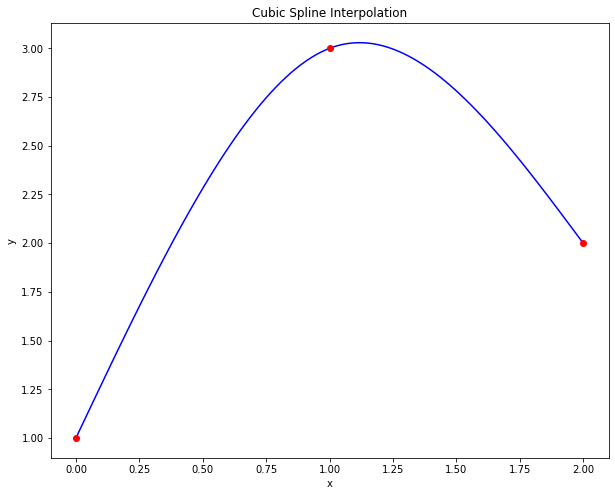

In [ ]:
cubic_spline((0, 1, 2), (1, 3, 2), 0, 2, 1.5)

##Numerical Differentiation

###Five-endpoint formula

In [ ]:
def five_endpoint_diff(f: 'function', x0: float, h: float) -> float:
  return ( -25*f(x0) + 48*f(x0+h) - 36*f(x0+(2*h)) + 16*f(x0+(3*h)) - 3*f(x0+(4*h)) ) / (12*h)

###Five-endpoint formula (without function)

In [ ]:
def five_endpoint_diff_no_func(y: tuple, h: float) -> float:
  return ( -25*y[0] + 48*y[1] - 36*y[2] + 16*y[3] - 3*y[4] ) / (12*h)

##Numerical Integration

###Simpson 1/3

In [ ]:
def simpson_1_3(values: tuple, h: float) -> float:
  return (h/3) * (values[0] + (4*values[1]) + values[2])

In [ ]:
fx = (0, 8, 0)
h = 2

simpson_1_3(fx, h)

21.333333333333332

###Simpson 3/8

In [ ]:
def simpson_3_8(values: tuple, h: float) -> float:
  return ((3*h)/8) * (values[0] + (3*values[1]) + (3*values[2]) + values[3])

In [ ]:
fx = (0, 64/9, 64/9, 0)
h = 4/3

simpson_3_8(fx, h)

21.333333333333332

###Trapezoidal Rule

In [ ]:
def trapezoid_rule(f: 'function', a: float, b: float) -> float:
  return (b-a) * ((f(a) + f(b)) / 2) 

In [ ]:
y = lambda x: np.sqrt(1 + (np.exp(2*x) * (np.tan(np.exp(x)))**2 ))

trapezoid_rule(y, -2, 0)

2.8509855041132894

###Trapezoidal Rule Multiple Application

In [ ]:
def trapezoidal_rule_multi(values: tuple, f: 'function', h: float) -> float:
  fxi = [f(i) for i in values[1:len(values)-1]]
  fxi_sum = sum(fxi)
  return (h/2) * ( f(values[0]) + 2*(fxi_sum) + f(values[len(values)-1]) )

In [ ]:
y = lambda x: np.sqrt(1 + (np.exp(2*x) * (np.tan(np.exp(x)))**2 ))
valores_x = (-2, -1, 0)
h = 1

trapezoidal_rule_multi(valores_x, y, h)

2.4354949535440555

In [ ]:
y = lambda x: np.sqrt(1 + (np.exp(2*x) * (np.tan(np.exp(x)))**2 ))
valores_x = (-2, -7/4, -3/2, -5/4, -1, -3/4, -1/2, -1/4, 0)
h = 1/4

trapezoidal_rule_multi(valores_x, y, h)

2.203919957096316

##Ordinary Differential Equations

In [3]:
def runge_kutta_ord2_c1(f: 'function', xv: list, y0: float, h: float):
  y_values = [y0]
  k1 = f(xv[0], y0)
  k2 = f(xv[0]+h, y0+k1*h)

  yi = y0 + ((0.5*k1)+(0.5*k2))*h
  y_values.append(yi)

  for x in xv[1:]:
    k1 = f(x, yi)
    k2 = f(x+h, yi+k1*h)

    yi = yi + ((0.5*k1)+(0.5*k2))*h
    y_values.append(yi)

  return y_values

[0, 0.5602111337922581, 5.301489797693046, 36.4071691365422]


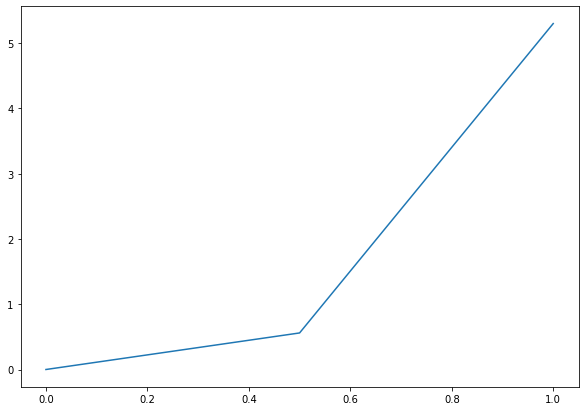

In [8]:
def f(x, y):
  return (x*np.exp(3*x)) - 2*y

xx = [0, 0.5, 1]
yy = runge_kutta_ord2_c1(f, xx, 0, 0.5)

fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(xx, yy[:3])

print(yy)

In [5]:
def runge_kutta_ord2_c2(f: 'function', xv: list, y0: float, h: float):
  y_values = [y0]
  k1 = f(xv[0], y0)
  k2 = f(xv[0]+(0.5*h), y0+(0.5*k1*h))

  yi = y0 + (k2)*h
  y_values.append(yi)

  for x in xv[1:]:
    k1 = f(x, yi)
    k2 = f(x+(0.5*h), yi+(0.5*k1*h))

    yi = yi + (k2)*h
    y_values.append(yi)

  return y_values

In [6]:
def runge_kutta_ord2_c3(f: 'function', xv: list, y0: float, h: float):
  y_values = [y0]
  k1 = f(xv[0], y0)
  k2 = f(xv[0]+((3/4)*h), y0+((3/4)*k1*h))

  yi = y0 + (((1/3)*k1)+((2/3)*k2))*h
  y_values.append(yi)

  for x in xv[1:]:
    k1 = f(x, yi)
    k2 = f(x+((3/4)*h), yi+((3/4)*k1*h))

    yi = y0 + (((1/3)*k1)+((2/3)*k2))*h
    y_values.append(yi)

  return y_values